<a href="https://colab.research.google.com/github/ssvakil/Machine-Learning-in-Python-Workshop/blob/master/MNIST%20logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
type(digits.data)

numpy.ndarray

In [31]:
(digits.data.shape, digits.target.shape, digits.images.shape)

((1797, 64), (1797,), (1797, 8, 8))

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

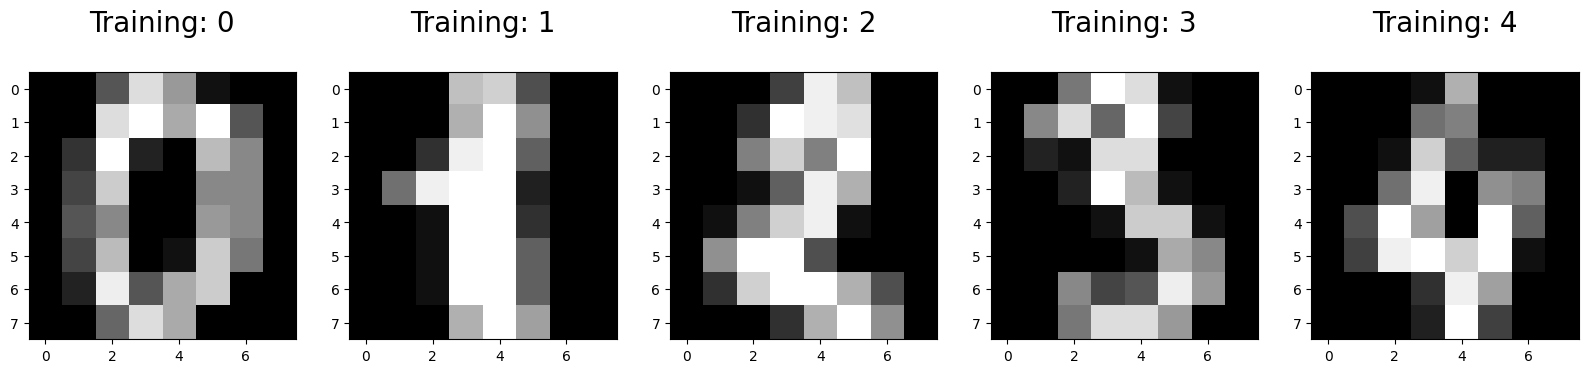

In [33]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], 
                                           digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                   test_size=0.25,
                                                   random_state=0)

In [35]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

In [37]:
LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [38]:
%%time
clf.fit(X_train, y_train)

CPU times: user 10.2 s, sys: 4.26 ms, total: 10.2 s
Wall time: 10.2 s


LogisticRegression(C=50, max_iter=10000, solver='saga')

In [39]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

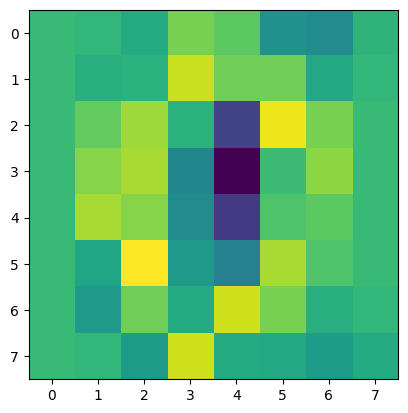

In [40]:
coef = clf.coef_.copy()
plt.imshow(coef[0].reshape(8,8).round(2));  # proof of concept

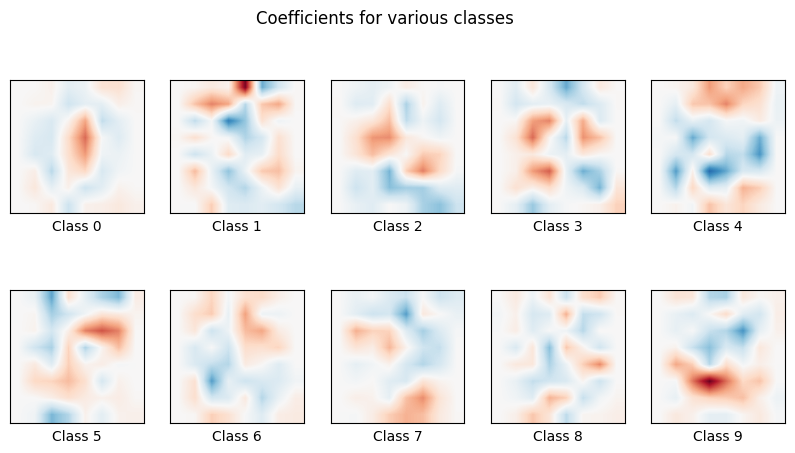

In [41]:
coef = clf.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(10,5))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(8,8), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

In [42]:
print(clf.predict(X_test[0:9]))
print(y_test[0:9])

[2 8 2 6 6 7 1 9 8]
[2 8 2 6 6 7 1 9 8]


In [43]:
clf.score(X_train, y_train) # training score

1.0

In [44]:
score = clf.score(X_test, y_test) # test score
score

0.9533333333333334

In [45]:
from sklearn import metrics
predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)

In [46]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassified_images.append(index)
    index +=1

In [47]:
print(misclassified_images)

[56, 94, 118, 124, 130, 169, 181, 196, 213, 251, 315, 325, 331, 335, 378, 398, 415, 425, 429, 430, 440]


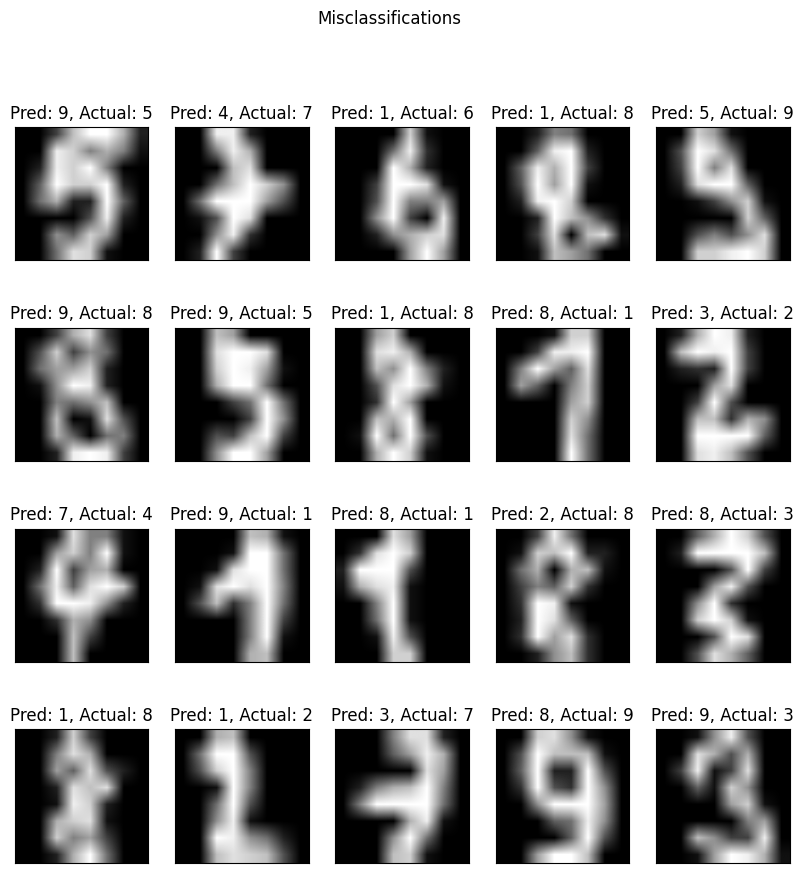

In [48]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {predictions[bad_index]}, Actual: {y_test[bad_index]}');

In [ ]:
#Predicting on full MNIST database

In [49]:
%%time
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


CPU times: user 33.1 s, sys: 1.94 s, total: 35 s
Wall time: 41.4 s


In [51]:
mnist.target.astype('int')

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(mnist.data, 
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/7.0,
                                                   random_state=0)

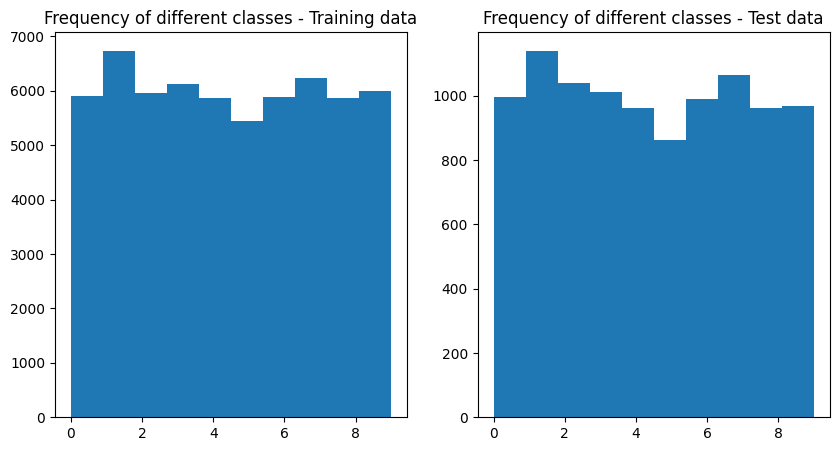

In [53]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y2_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y2_test);
plt.title('Frequency of different classes - Test data');

In [54]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )
clf2
LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=5, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=2,
                   warm_start=False)

LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [55]:
%%time
clf2.fit(X2_train, y2_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 49 epochs took 351 seconds
CPU times: user 5min 41s, sys: 299 ms, total: 5min 41s
Wall time: 5min 51s


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  5.9min finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

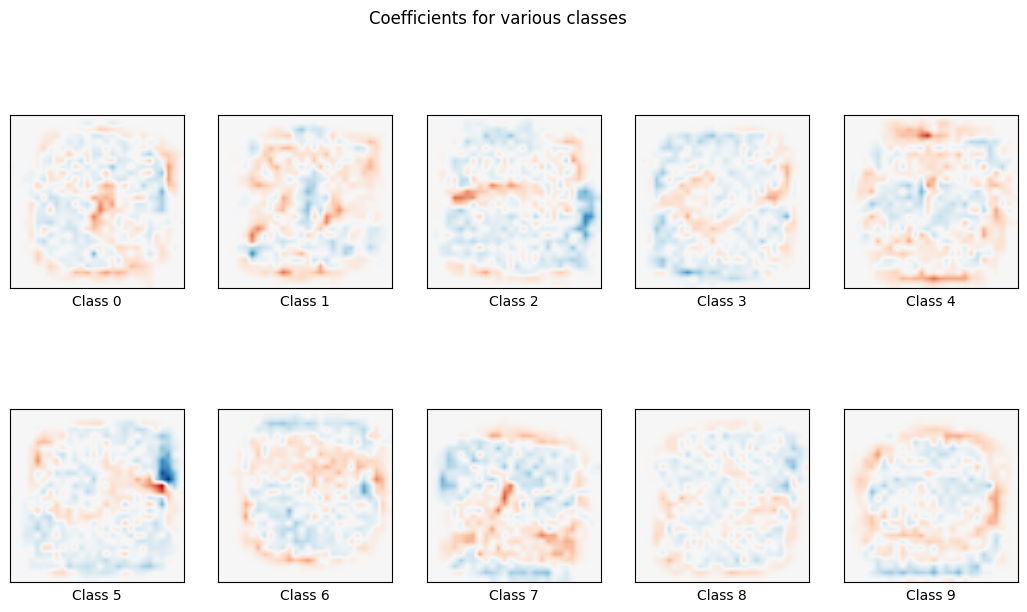

In [56]:
coef = clf2.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

In [57]:
clf2.score(X2_train, y2_train)

0.9375666666666667

In [58]:
score2 = clf2.score(X2_test, y2_test) # test score
score2

0.9195

In [59]:
from sklearn import metrics
predictions2 = clf2.predict(X2_test)

cm = metrics.confusion_matrix(y_true=y2_test, 
                         y_pred = predictions2, 
                        labels = clf2.classes_)
cm

array([[ 968,    0,    1,    2,    1,    8,    9,    0,    7,    0],
       [   0, 1114,    5,    3,    1,    5,    0,    4,    7,    2],
       [   3,   13,  931,   18,   12,    1,   15,   10,   34,    3],
       [   1,    5,   33,  894,    0,   26,    2,   12,   27,   13],
       [   1,    2,    5,    1,  897,    1,   11,    9,    7,   28],
       [  10,    2,    6,   30,    9,  748,   16,    6,   29,    7],
       [   7,    3,    6,    0,   11,   17,  940,    1,    4,    0],
       [   2,    5,   14,    2,   12,    2,    1,  981,    4,   41],
       [   4,   17,    8,   18,    6,   25,    9,    2,  862,   12],
       [   4,    5,    6,   10,   35,    7,    2,   31,    9,  860]])

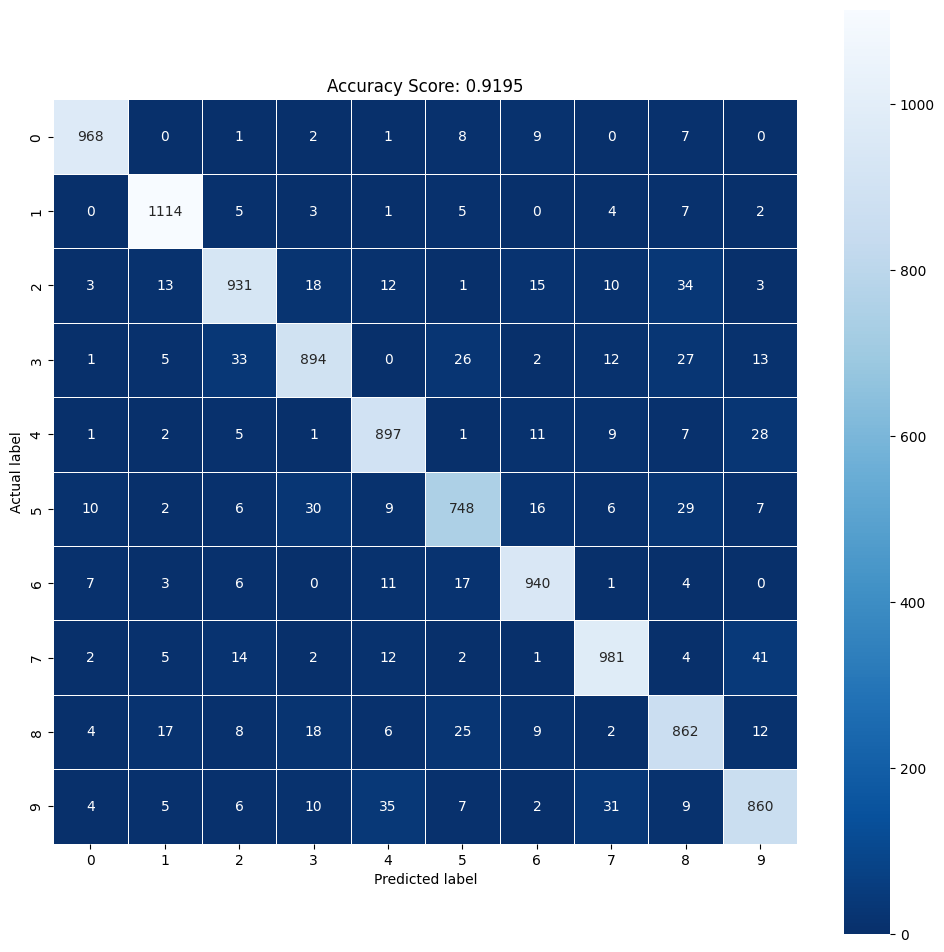

In [60]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title);